# Watershed Segmentation Tutorial

**To get function help, click within the function parentheses then click shift+tab**

**Remember to use tab for autocompletion**

The Watershed Segmentation Function is a PlantCV function based on code contributed by Suxing Liu, Arkansas State University. 
For more information see https://github.com/lsx1980/Leaf_count. 
This function uses the watershed algorithm to detect boundary of objects. 
Needs a mask file which specifies area which is object is white, and background is black. 

In [41]:
%matplotlib widget
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs

In [42]:
# Input/output options
args = WorkflowInputs(
    images=["./img/arabidopsis.jpg"],
    names="image1",
    result="segmentation_results",
    outdir=".",
    writeimg=False,
    debug="plot"
    )

In [43]:
# Set debug to the global parameter 
pcv.params.debug = args.debug
# Change display settings
pcv.params.dpi = 100
pcv.params.text_size = 20
pcv.params.text_thickness = 20

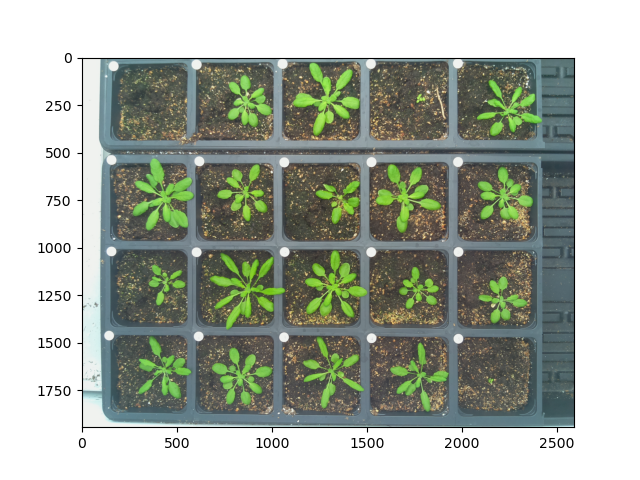

In [44]:
# Read Image

img, path, filename = pcv.readimage(filename=args.image1)


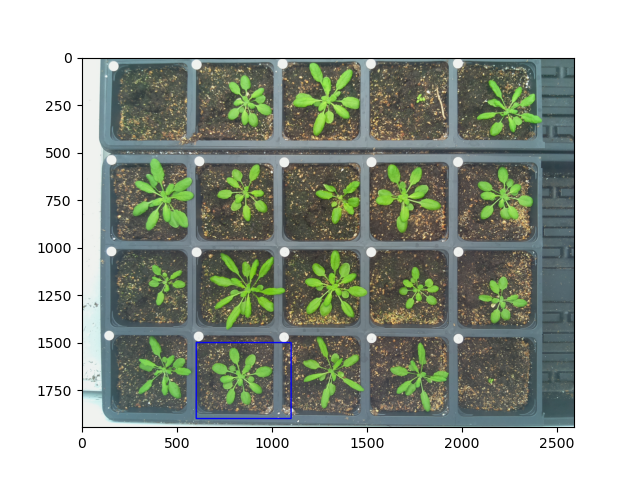

In [45]:
# Crop the image down to focus on just one plant

crop_img = pcv.crop(img=img, x=600, y=1500, h=400, w=500)

#### Use plantcv.visualize.colorspace to visualize colorspaces with good contrast between target object (plant) and background
# In this case the A channel has good contrast between plants and background
# This step would not go into a workflow when you run it in parallel

colorspace_img = pcv.visualize.colorspaces(rgb_img=img)

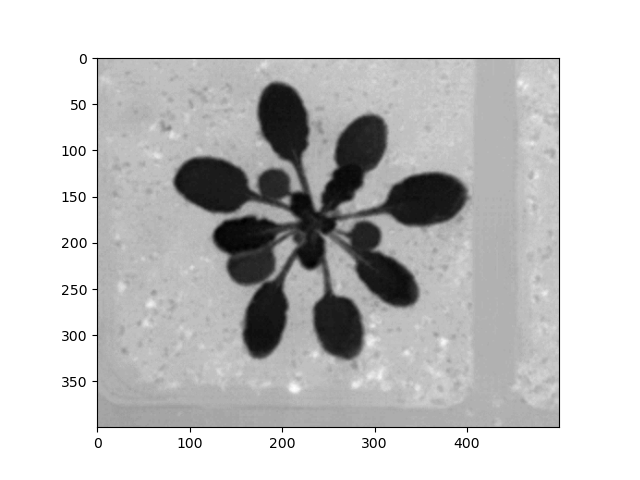

In [46]:
# Convert image from RGB color space to LAB and keep only the green-magenta channel 

a = pcv.rgb2gray_lab(rgb_img=crop_img, channel='a')

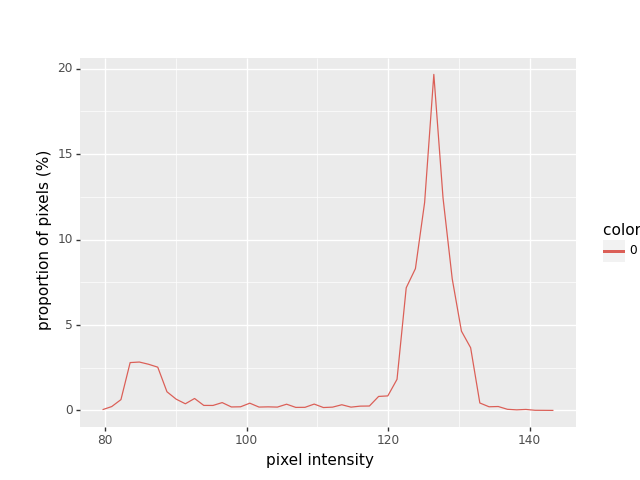

In [47]:
#Use pcv.visualize.histogram to aid in picking a value for binary threshold (next step)
# This step would not go into a workflow when you run it in parallel

hist_figure1, hist_data1 = pcv.visualize.histogram(a, hist_data=True, bins=50)


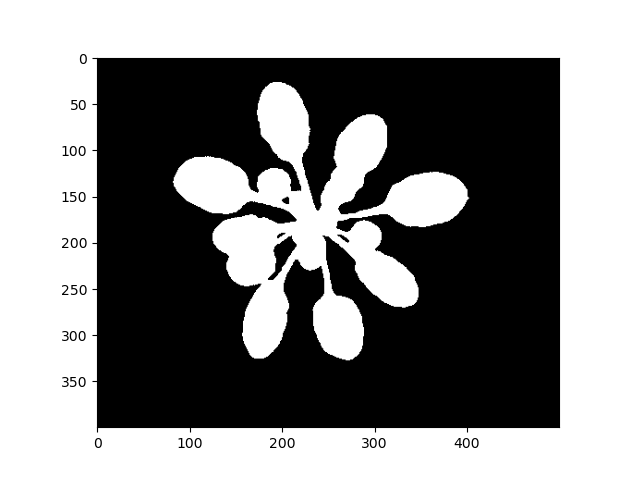

In [48]:
# Set a binary threshold on the image 

img_binary = pcv.threshold.binary(gray_img=a, threshold=110, object_type='dark')


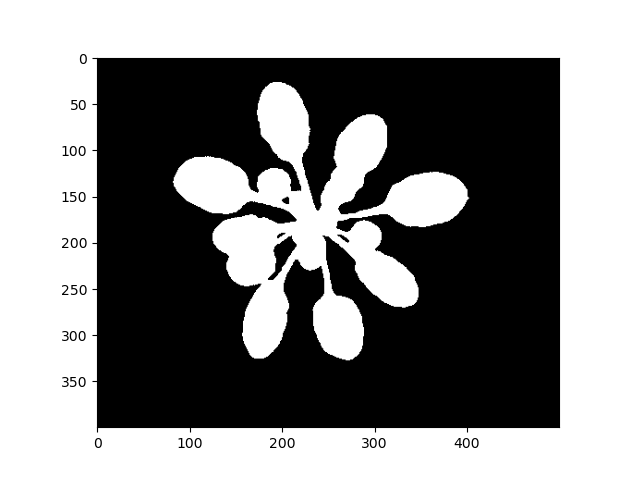

In [49]:
#Fill small noise

fill_image = pcv.fill(bin_img=img_binary, size=200)

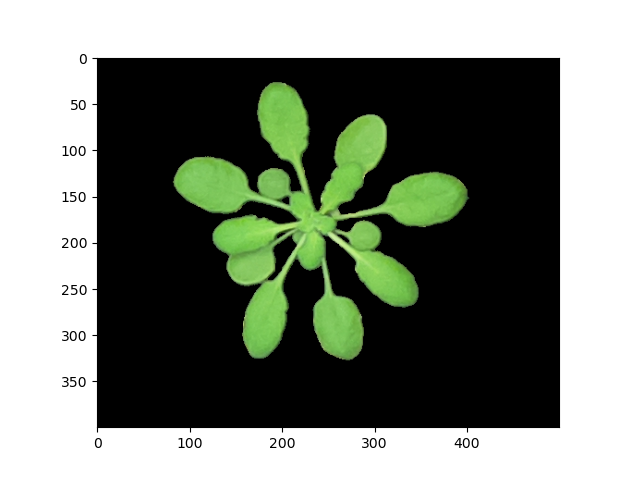

In [50]:
#Apply binary mask to original cropped image

masked = pcv.apply_mask(img=crop_img, mask=fill_image, mask_color="black")

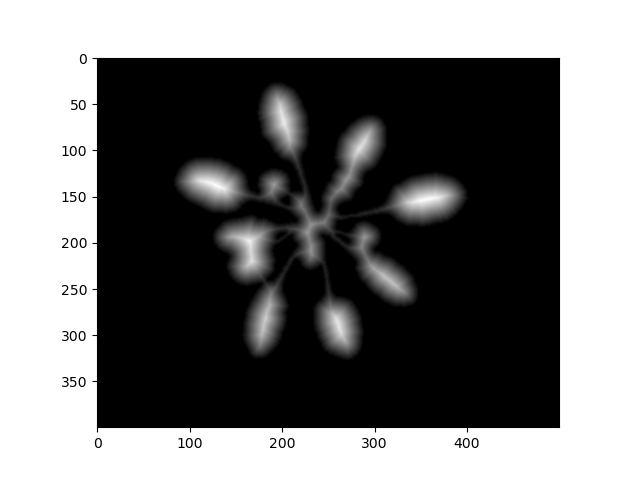

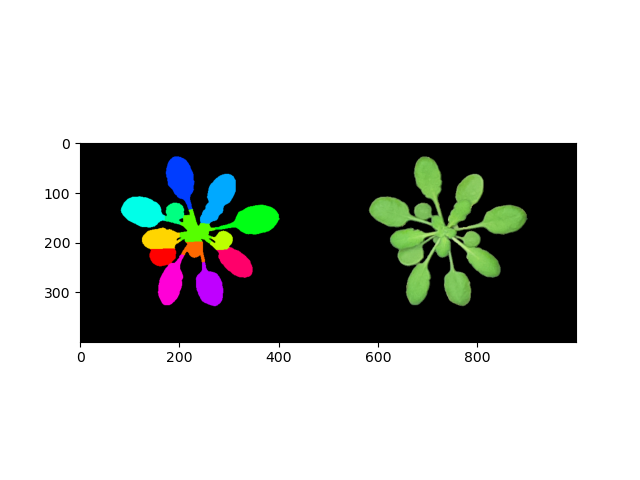

In [51]:
#Apply Watershed Segmentation Function

analysis_images = pcv.watershed_segmentation(rgb_img=masked, mask=fill_image, distance=15, label="default")


In [59]:
# Print Number of objects just to see result
# This step would not go into a workflow when you run it in parallel

count=pcv.outputs.observations["default"]["estimated_object_count"]["value"]
print(count)

13


In [ ]:
# The save results function will take the measurements stored when running any PlantCV analysis functions, format, 
# and print an output text file for data analysis. The Outputs class stores data whenever any of the following functions
# are ran: analyze_bound_horizontal, analyze_bound_vertical, analyze_color, analyze_nir_intensity, analyze_object, 
# fluor_fvfm, report_size_marker_area, watershed. If no functions have been run, it will print an empty text file 

pcv.outputs.save_results(filename=args.result)